In [1]:
from scipy.stats import beta, gamma, lognorm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lognormal distribution

### Constant mu, varying sigma

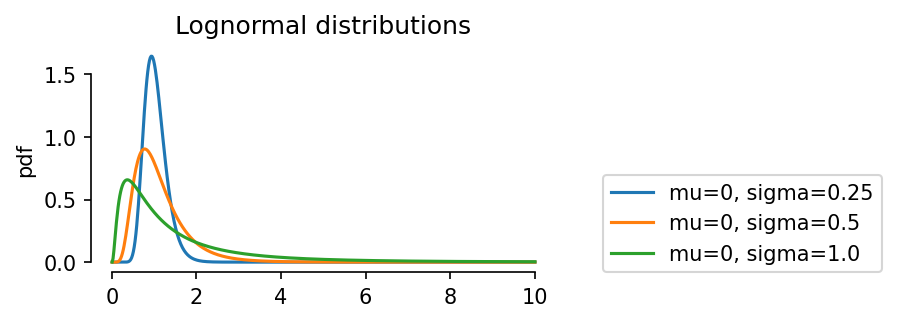

In [19]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=150)

mu = 0
for sigma in [0.25, 0.5, 1.]:
    x = np.linspace(0.01, 10, 500)
    ax.plot(x, lognorm(loc=mu, s=sigma).pdf(x), label= f'mu={mu}, sigma={sigma}')

ax.legend(loc=(1.1, 0))
ax.set_title("Lognormal distributions")
ax.set_xlabel('')
ax.set_ylabel('pdf')

sns.despine(trim=True)

# Beta distribution

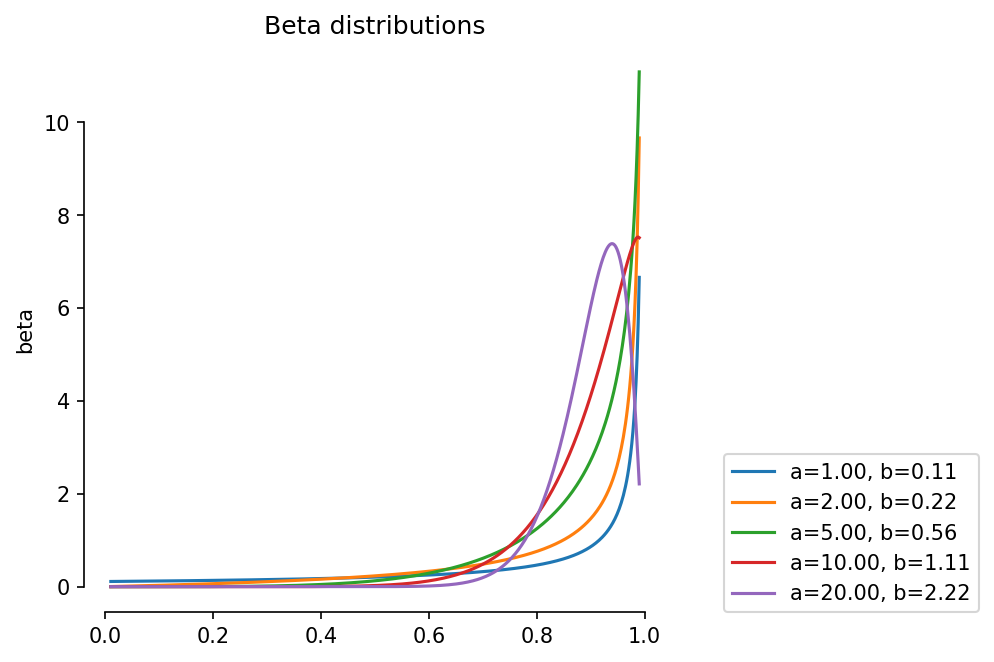

In [5]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)

q_null = .9
for Alpha in np.array([1, 2, 5, 10, 20]):
    Beta = (1-q_null)/q_null*Alpha
    beta_distribution = beta(a=Alpha, b=Beta)
    x = np.linspace(0.01, .99, 500)
    ax.plot(x, beta_distribution.pdf(x), label='a={:.2f}, b={:.2f}'.format(Alpha, Beta))    

ax.legend(loc=(1.1, 0))
ax.set_title("Beta distributions")
ax.set_xlabel('')
ax.set_ylabel('beta')

sns.despine(trim=True)

# Gamma distribution

### Constant k varying theta

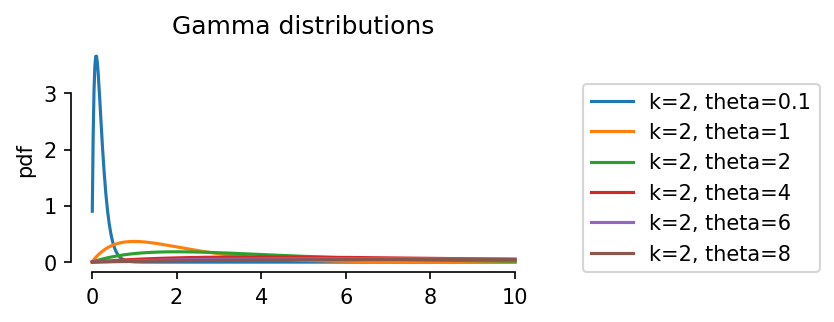

In [6]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=150)

k = 2
for theta in [.1, 1, 2, 4, 6, 8]:
    x = np.linspace(0.01, 10, 500)
    ax.plot(x, gamma(k, 0, theta).pdf(x), label= f'k={k}, theta={theta}')

ax.legend(loc=(1.1, 0))
ax.set_title("Gamma distributions")
ax.set_xlabel('')
ax.set_ylabel('pdf')

sns.despine(trim=True)

### Constant theta varying k

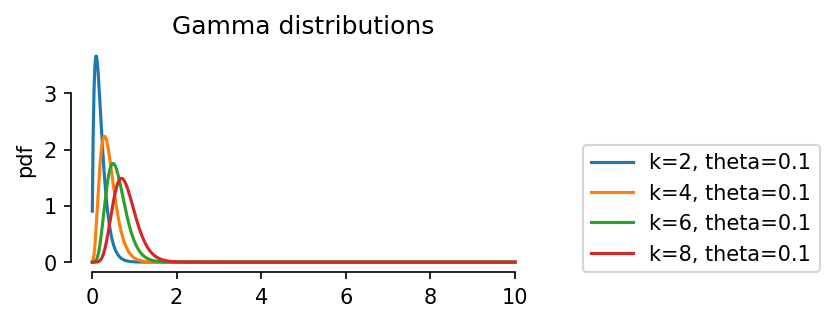

In [7]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=150)

theta = .1
for k in [2, 4, 6, 8]:
    x = np.linspace(0.01, 10, 500)
    ax.plot(x, gamma(k, 0, theta).pdf(x), label= f'k={k}, theta={theta}')

ax.legend(loc=(1.1, 0))
ax.set_title("Gamma distributions")
ax.set_xlabel('')
ax.set_ylabel('pdf')

sns.despine(trim=True)

# ZIG (Demo)

In [8]:
thetas = [2, 2, 5]
ks = [1, 2, 2]
locs = [.8]*3
qs = [0.5, .6, .8]

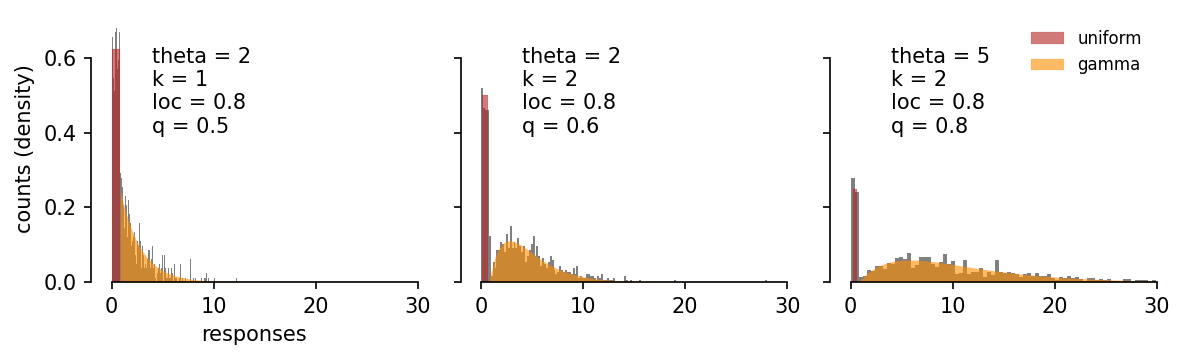

In [11]:
samples_n = 1000

plotting_step = 4
name = f"zig sim step {plotting_step}"

np.random.seed(42)

fig, axes = plt.subplots(1, 3, figsize=(8, 2.5), dpi=150, sharey=True)

for i, (ax, theta, k, loc, q) in enumerate(zip(axes.flat, thetas, ks, locs, qs)):
    
    samples = gamma(k, loc=loc, scale=theta).rvs(samples_n)
    uniform_samples = np.random.rand(samples_n) * loc
    uniform_samples_idx = (np.random.rand(samples_n) >= q)#.astype(np.int)
    samples[uniform_samples_idx] = uniform_samples[uniform_samples_idx]
    
    _, edges, _ = ax.hist(samples, bins=150, density=True, color='.5', zorder=0);
    x = (edges[1:] + edges[:-1])/2
    
    y_gamma = gamma(k, loc=loc, scale=theta).pdf(x[x>=loc]) * q
    y_uniform = np.ones(len(x[x<loc])) * (1-q)/loc
    y = np.hstack([y_uniform, y_gamma])
    
    if plotting_step >= 2:
        ax.fill_between(x[x<loc], y_uniform, lw=.1, color='firebrick', alpha=.6, zorder=1, label='uniform');
    
    if plotting_step >= 3:
        ax.fill_between(x[x>=loc], y_gamma, lw=.1, color='darkorange', alpha=.6, zorder=1, label='gamma');
    
    if plotting_step >= 2:
        if i == 2:
            ax.legend(frameon=False, fontsize=8)

    if i==0:
        ax.set(xlabel='responses', ylabel='counts (density)')
        
    if plotting_step >= 4:
        ax.text(4, 0.4, f'theta = {theta}\nk = {k}\nloc = {loc}\nq = {q}')
    ax.set(xlim = (-2, 30))
    

sns.despine(trim=True)
fig.tight_layout()

# fig.savefig('figures/' + name + ".png", bbox_inches='tight')